# Import the Dataset

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import glob
import statistics

In [2]:
# read data
data = pd.read_csv("marketing_campaign.csv", sep=";")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [9]:
data.head()

,YearBirth,Education,MaritalStatus,Income,KidHome,TeenHome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year,Month,Age
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,0,1,2012,9,Elderly
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,0,2014,3,Elderly
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,0,2013,8,MiddleAge
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,0,2014,2,Young
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,0,2014,1,Young


In [10]:
data.tail()

,YearBirth,Education,MaritalStatus,Income,KidHome,TeenHome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year,Month,Age
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,0,0,0,0,0,0,0,2013,6,MiddleAge
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,0,0,0,1,0,0,0,2014,6,Elderly
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,0,1,0,0,0,0,0,2014,1,Young
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,0,0,0,0,0,0,0,2014,1,Elderly
2239,1954,PhD,Married,52869.0,1,1,40,84,3,61,...,0,0,0,0,0,0,1,2012,10,Elderly


# Data preparation and Cleaning

In [3]:
# rename the columns
data.rename(columns = {'Year_Birth': 'YearBirth',
                       'Marital_Status': 'MaritalStatus', 
                       'Dt_Customer': 'DtCustomer', 
                       'Z_CostContact': 'ZCostContact',
                       'Z_Revenue': 'ZRevenue', 
                       'Kidhome': 'KidHome',
                       'Teenhome': 'TeenHome'}, inplace = True)
data.head()

,ID,YearBirth,Education,MaritalStatus,Income,KidHome,TeenHome,DtCustomer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,ZCostContact,ZRevenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# check the null data
data.isnull().sum()

ID                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
KidHome                 0
TeenHome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
ZCostContact            0
ZRevenue                0
Response                0
dtype: int64

In [5]:
# fill the null values in numerical columns with average specific to certain column
# fill in the missing data in the columns according to the Education average.
unique_Education = pd.unique(data.Education)

# find Income averages in Education specific
# Equalize the average Income values to the missing values in Income specific to Education
temp_data = data.copy()  # set temp_data variable to avoid losing real data
columns = ['Income'] # it can be add more column
for c in unique_Education:
    
    # create Education filter
    Education_filtre = temp_data.Education == c
    # filter data by Education
    filtered_data = temp_data[Education_filtre]
    
    # find average for Income in specific to Education
    for s in columns:
        mean = np.round(np.mean(filtered_data[s]), 2)
        if ~np.isnan(mean): # if there if average specific to Education
            filtered_data[s] = filtered_data[s].fillna(mean)
            print(f"Missing Value in {s} column fill with {mean} when Education:{c}")
        else: # find average for all data if no average in specific to Education
            all_data_mean = np.round(np.mean(data[s]), 2)
            filtered_data[s] = filtered_data[s].fillna(all_data_mean)
            print(f"Missing Value in {s} column fill with {all_data_mean}")
    # Synchronize data filled with missing values in Income to data temporary            
    temp_data[Education_filtre] = filtered_data

# equate the deprecated temporary data to the real data variable
data = temp_data.copy() 

Missing Value in Income column fill with 52720.37 when Education:Graduation
Missing Value in Income column fill with 56145.31 when Education:PhD
Missing Value in Income column fill with 52917.53 when Education:Master
Missing Value in Income column fill with 20306.26 when Education:Basic
Missing Value in Income column fill with 47633.19 when Education:2n Cycle


C:\Users\yashs\AppData\Local\Temp\ipykernel_9932\314526681.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[s] = filtered_data[s].fillna(mean)


In [6]:
# check null data
data.isnull().sum()

ID                     0
YearBirth              0
Education              0
MaritalStatus          0
Income                 0
KidHome                0
TeenHome               0
DtCustomer             0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
ZCostContact           0
ZRevenue               0
Response               0
dtype: int64

In [7]:
#check duplicated data
data.duplicated().sum()

0

In [8]:
# creating Year, Month, Age column for further analysis
from datetime import datetime as dt

# convert the 'Date' column to datetime format
data['DtCustomer']= pd.to_datetime(data['DtCustomer'])

# create Year, Month, Day columns
data['Year'] = data["DtCustomer"].dt.year
data['Month'] = data["DtCustomer"].dt.month

#create Age column 
age = []
for i in data["YearBirth"]:
    if i <= 1959:
        age.append("Elderly")
    elif i > 1959 and i <=1977:
        age.append("MiddleAge")
    else:
        age.append("Young")
data["Age"] = age

# drop original date column and other unnecessary columns
data.drop(['DtCustomer', 'ID', 'ZCostContact', 'ZRevenue'], axis=1, inplace=True)

# Exploratory Data Analysis and Data Visualization

In [11]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YearBirth            2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   MaritalStatus        2240 non-null   object 
 3   Income               2240 non-null   float64
 4   KidHome              2240 non-null   int64  
 5   TeenHome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [12]:
# statistical information about numerical data
data.drop(["AcceptedCmp3", "AcceptedCmp4","AcceptedCmp5", "AcceptedCmp1",
           "AcceptedCmp2", "Complain", "Response", "Year", "Month"], axis=1).describe()

,YearBirth,Income,KidHome,TeenHome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52253.592339,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,11.984069,25039.085599,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51609.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [13]:
# statistical information about categorical data
data[["Education", "MaritalStatus"]].describe()

,Education,MaritalStatus
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


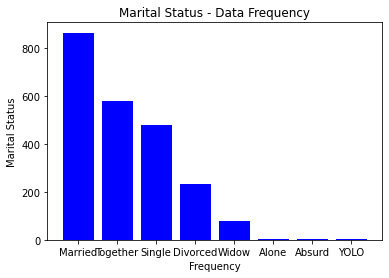

Number of Samples According to Marital Status 
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: MaritalStatus, dtype: int64


In [14]:
# Number of sample according to MaritalStatus
plt.figure()
plt.bar(data["MaritalStatus"].value_counts().index, data["MaritalStatus"].value_counts(), color = "b")
plt.xlabel("Frequency")
plt.ylabel("Marital Status")
plt.title("Marital Status - Data Frequency")
plt.show()
print(f"Number of Samples According to Marital Status \n{data['MaritalStatus'].value_counts()}")

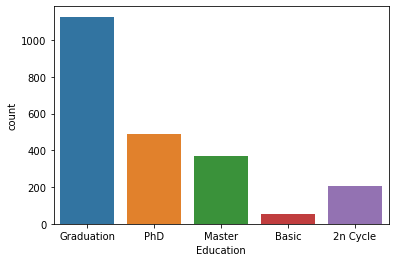

Number of samples According to Education 
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [15]:
# Number of samples according to Education
sns.countplot(x="Education", data=data)
plt.xticks(rotation = 0)
plt.show()
print(f"Number of samples According to Education \n{data['Education'].value_counts()}")

In [16]:
# pivot table for see maritalstatus according to education
df = data[["Education", 'MaritalStatus']].value_counts().groupby(["Education", "MaritalStatus"]).sum().reset_index().sort_values(by=['Education','MaritalStatus'], ascending=False)
df = (df.pivot(index='Education', columns='MaritalStatus', values=0))
df

MaritalStatus,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,23.0,81.0,37.0,57.0,5.0,NaN
Basic,NaN,NaN,1.0,20.0,18.0,14.0,1.0,NaN
Graduation,1.0,1.0,119.0,433.0,252.0,286.0,35.0,NaN
Master,1.0,1.0,37.0,138.0,75.0,106.0,12.0,NaN
PhD,NaN,1.0,52.0,192.0,98.0,117.0,24.0,2.0


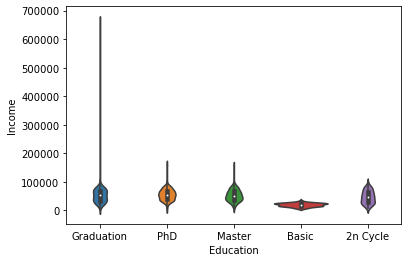

In [17]:
sns.violinplot(x="Education", y="Income", data=data)
plt.show()

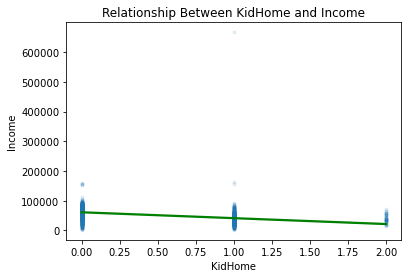

In [18]:
sns.regplot(x='KidHome', y='Income', data=data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"green"})
plt.title('Relationship Between KidHome and Income')
plt.show()

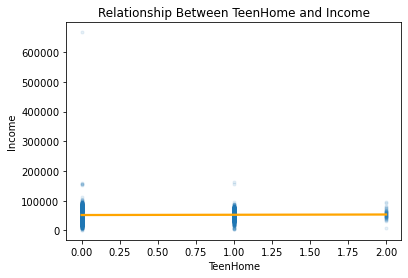

In [19]:
sns.regplot(x='TeenHome', y='Income', data=data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"orange"})
plt.title('Relationship Between TeenHome and Income')
plt.show()

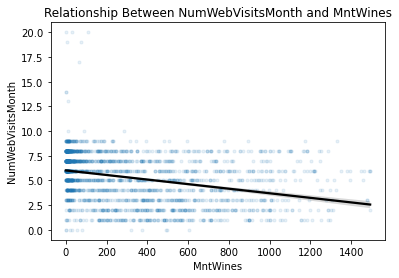

In [20]:
sns.regplot(x='MntWines', y='NumWebVisitsMonth', data=data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"black"})
plt.title('Relationship Between NumWebVisitsMonth and MntWines')
plt.show()

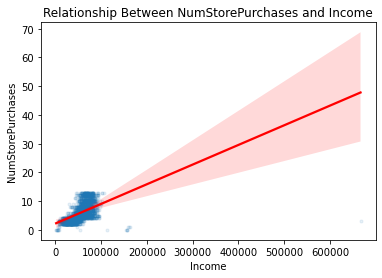

In [21]:
sns.regplot(x='Income', y='NumStorePurchases', data=data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"red"})
plt.title('Relationship Between NumStorePurchases and Income')
plt.show()

Campaign Analysis

In [22]:
# see the response results according to education
pd.crosstab(index= data['Education'] , columns=data['Response'])

Response,0,1
Education,,
2n Cycle,181,22
Basic,52,2
Graduation,975,152
Master,313,57
PhD,385,101


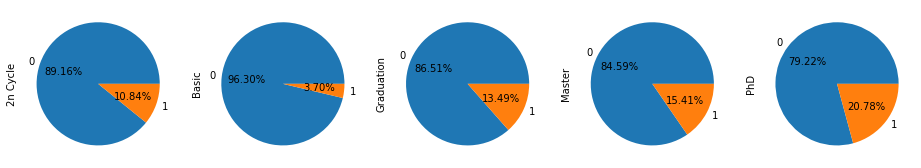

In [23]:
# see the response rate according to education
pd.crosstab(index=data['Response'], columns=data['Education']).plot(kind="pie", figsize=(16, 8), subplots=True, autopct='%1.2f%%', legend=False)
plt.show()

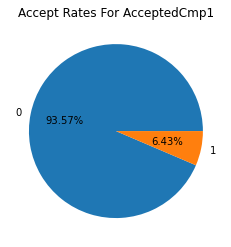

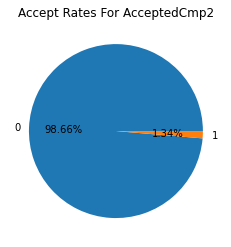

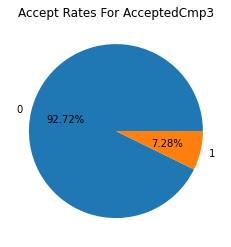

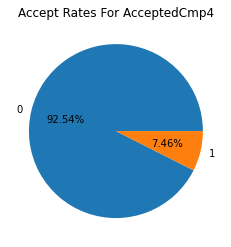

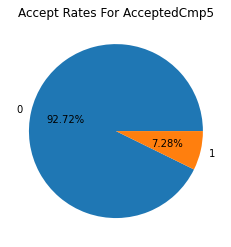

In [24]:
# campaign accept rates 
campaigns = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5",]
for i in campaigns:
    accept_rate = (data.groupby(i).size() / data[i].count()) * 100
    plt.title(f"Accept Rates For {i}")
    plt.pie(accept_rate, labels=data[i].unique(), autopct='%1.2f%%')
    plt.show() 

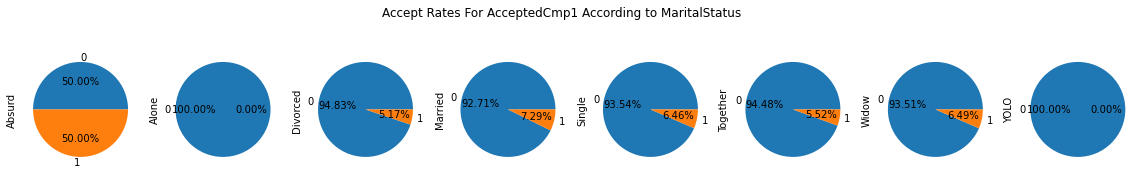

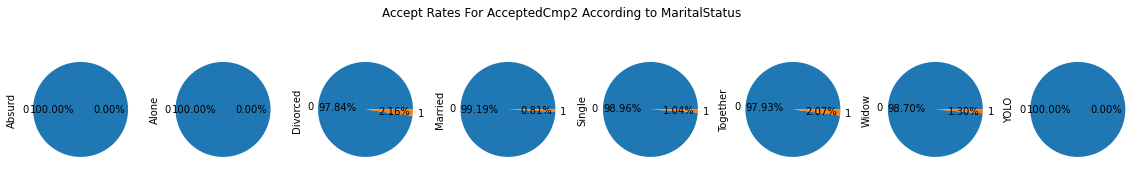

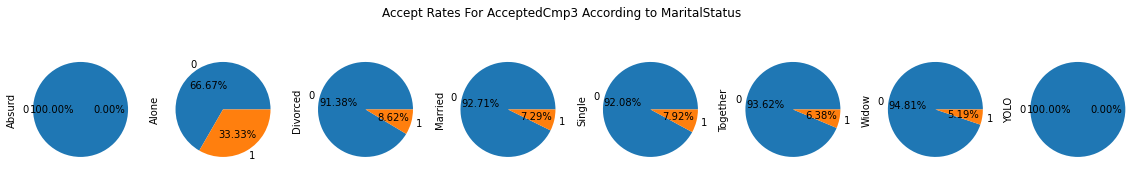

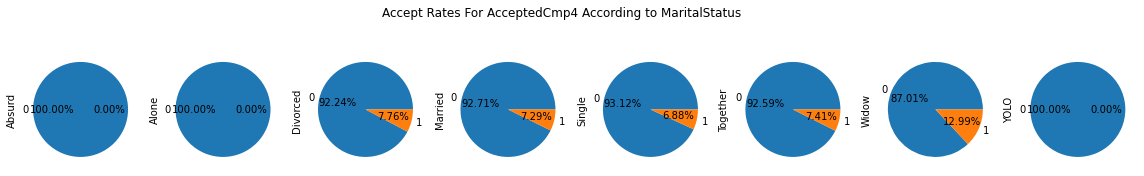

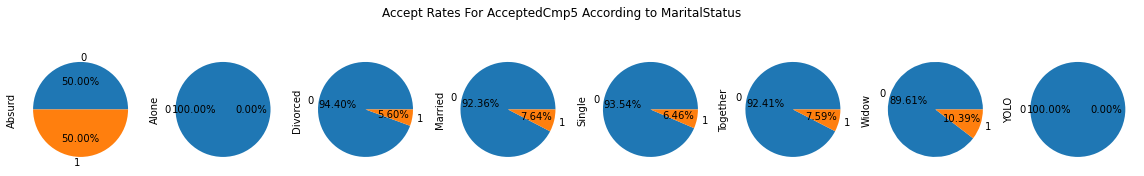

In [25]:
for i in campaigns:
    pd.crosstab(index= data[i] , columns=data['MaritalStatus']).plot(kind="pie", figsize=(20, 3), subplots=True, autopct='%1.2f%%',
                                                                     legend=False, title=f"Accept Rates For {i} According to MaritalStatus")
    plt.show()

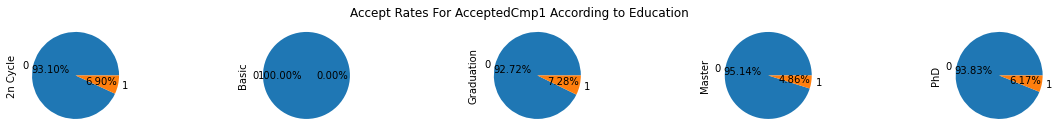

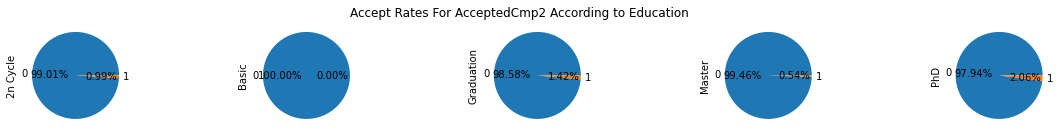

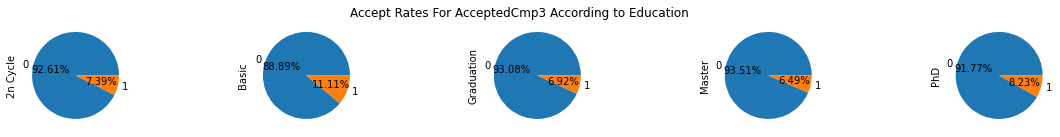

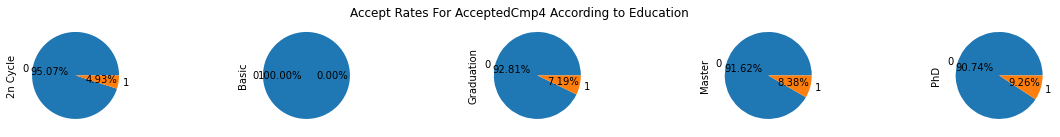

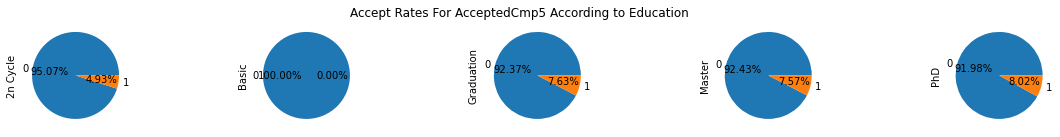

In [26]:
for i in campaigns:
    pd.crosstab(index= data[i] , columns=data['Education']).plot(kind="pie", figsize=(20, 2), subplots=True, autopct='%1.2f%%',
                                                                 legend=False, title=f"Accept Rates For {i} According to Education")
    plt.show()

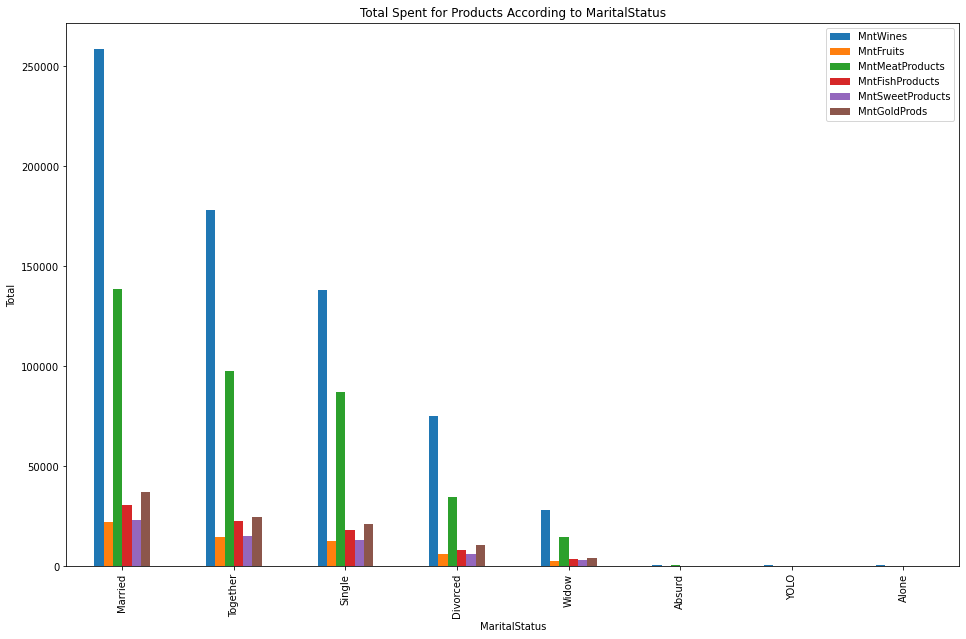

In [27]:
# total spent according to maritalstatus
df = data[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", 'MaritalStatus']].groupby(["MaritalStatus"]).sum().reset_index().sort_values(by=["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"], ascending=False)
df.plot(x="MaritalStatus", ylabel= "Total", kind="bar", figsize=(16, 10), legend=True, title="Total Spent for Products According to MaritalStatus")
plt.show()

Purchase Analysis According to Age

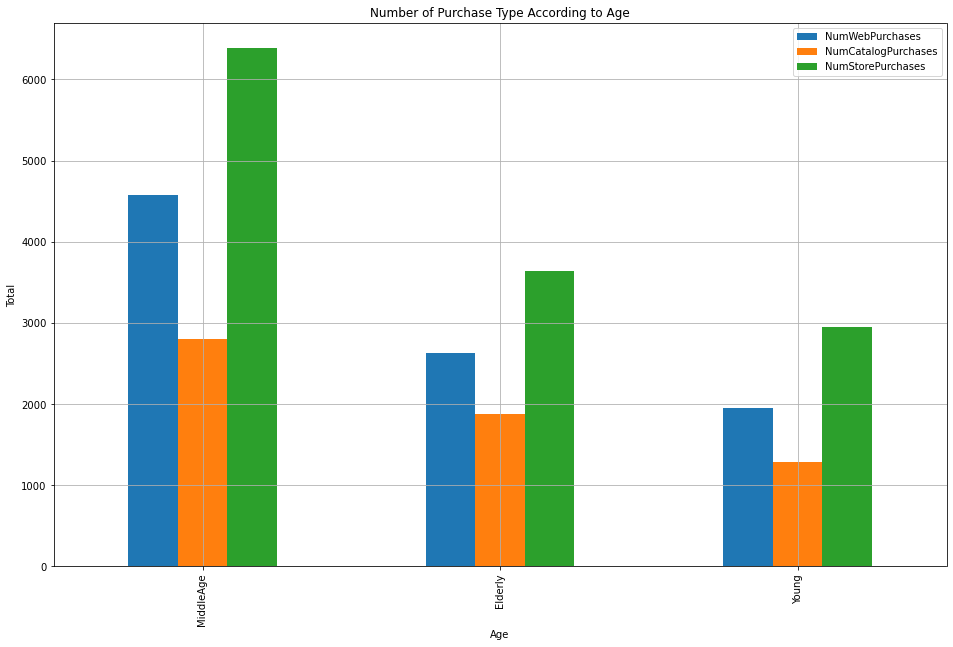

In [28]:
# purchase type according to age
df = data[["Age", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].groupby(["Age"]).sum().reset_index().sort_values(by=["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"], ascending=False)
df.plot(x="Age", ylabel= "Total", kind="bar", figsize=(16, 10), legend=True, grid=True, 
        title="Number of Purchase Type According to Age")
plt.show()

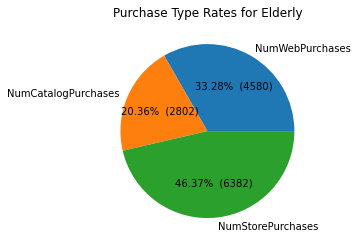

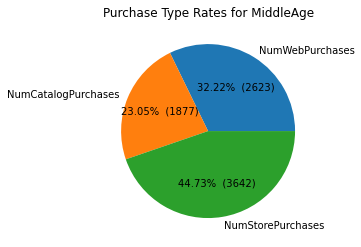

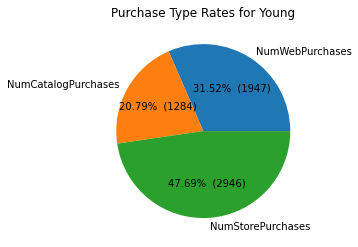

In [29]:
# Purchase Type Rates according to Age
# set target row index
target_row_index = [0, 1, 2]

# make the pie circular by setting the aspect ratio to 1
plt.figure(figsize=plt.figaspect(1))

# specify data for chart
values = df.iloc[target_row_index, 1:]
labels = df.columns[1:]

# define function to format values on chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.2f}%  ({val:d})'
    return my_autopct

for i in target_row_index:
    values = df.iloc[i, 1:]
    labels = df.columns[1:]
    plt.title(f"Purchase Type Rates for {df.loc[i].Age}")
    plt.pie(values, labels=labels, autopct=make_autopct(values))
    plt.show()

Complain Analysis

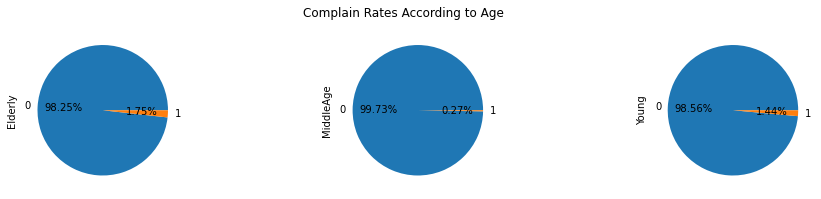

In [30]:
# complain rates according to age
df = pd.crosstab(index= data["Complain"] , columns=data['Age'])
df.plot(x="Complain", kind="pie", figsize=(16, 3), legend=False, subplots=True, autopct='%1.2f%%',
        title="Complain Rates According to Age")
plt.show()

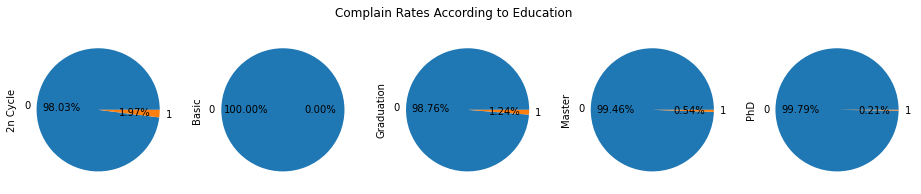

In [31]:
df = pd.crosstab(index= data["Complain"] , columns=data['Education'])
df.plot(x="Complain", kind="pie", figsize=(16, 3), legend=False, subplots=True, autopct='%1.2f%%',
        title="Complain Rates According to Education")
plt.show()

Monthly Discount Analysis

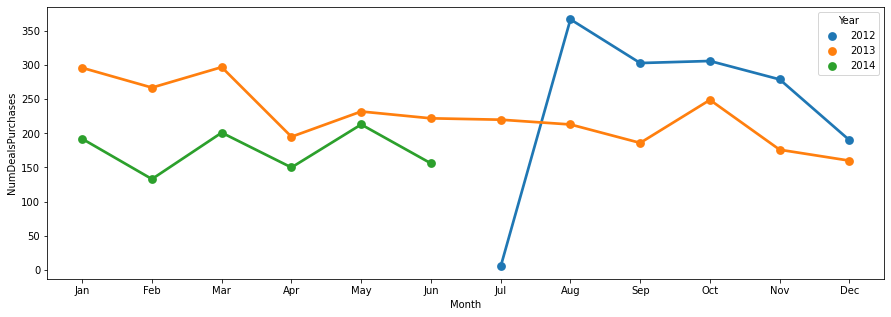

In [32]:
# number of purchases made with discount according to month
custom_dict = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5,
               'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}
temp_data = data.copy()
temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
df = temp_data[['Month', 'Year', "NumDealsPurchases"]].groupby(["Year","Month"]).sum().reset_index().sort_values(by=['Year','Month', 'NumDealsPurchases'], ascending=False)
df = df.iloc[df['Month'].map(custom_dict).argsort()]
f, ax=plt.subplots(figsize=(15, 5))
sns.pointplot(x='Month', y="NumDealsPurchases", data=df, hue="Year")
plt.show()

Recency Analysis

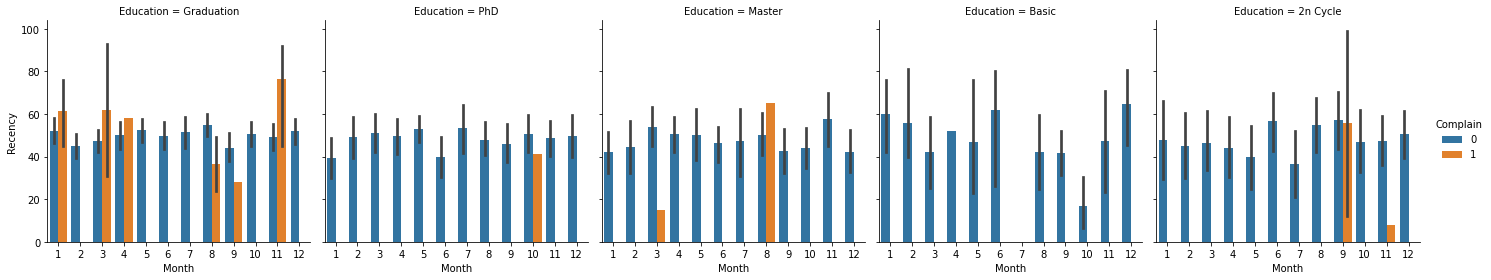

In [33]:
# Recency Analysis According  to Complain and Education
sns.catplot(x="Month", y="Recency",  hue="Complain", col="Education",
            data=data, kind="bar", height=4)
plt.show()

# Preprocessing

In [34]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YearBirth            2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   MaritalStatus        2240 non-null   object 
 3   Income               2240 non-null   float64
 4   KidHome              2240 non-null   int64  
 5   TeenHome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [35]:
# drop some unnecessary columns
data.drop(["Year", "Month", "YearBirth", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response", "Complain"], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   MaritalStatus        2240 non-null   object 
 2   Income               2240 non-null   float64
 3   KidHome              2240 non-null   int64  
 4   TeenHome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [36]:
# for categorical variables use OneHotEncoder
data = pd.get_dummies(data, columns=['Age', "Education", "MaritalStatus"])
data.head(3)

,Income,KidHome,TeenHome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,MaritalStatus_Absurd,MaritalStatus_Alone,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Together,MaritalStatus_Widow,MaritalStatus_YOLO
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,0,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,0,0,1,0,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,1,0,0


In [37]:
# for normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data), columns= data.columns )

# Dimensionality Reduction

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(data)
PCA_ds = pd.DataFrame(pca.transform(data), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2240.0,1.962716e-16,2.472810,-5.232802,-2.306545,-0.578275,2.149477,6.568714
col2,2240.0,-5.095131e-17,1.537674,-3.931740,-1.150395,0.094283,1.136883,4.648594
col3,2240.0,-1.685160e-18,1.314222,-3.338914,-1.036042,0.022143,0.834305,3.596822


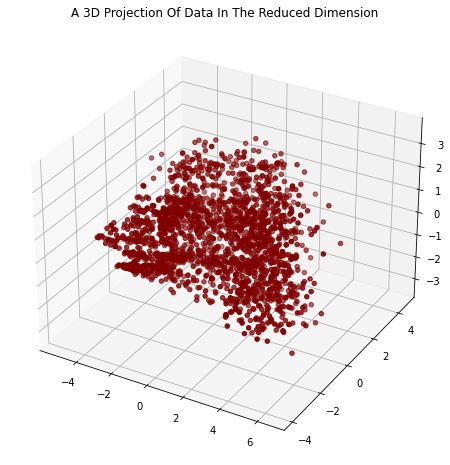

In [39]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Customer Clustering

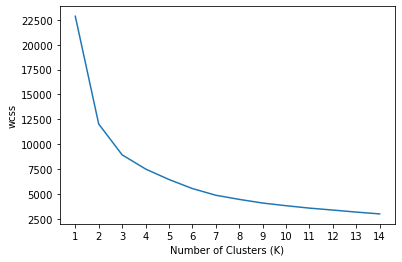

In [40]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(PCA_ds)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1,15), wcss)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("wcss")
plt.show()

In [42]:
from sklearn.cluster import AgglomerativeClustering
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

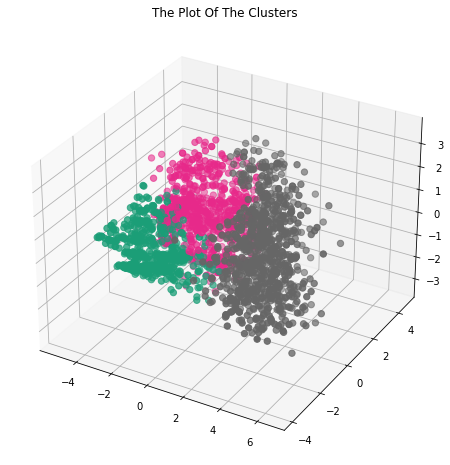

In [44]:
#Plotting the clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap="Dark2_r")
ax.set_title("The Plot Of The Clusters")
plt.show()

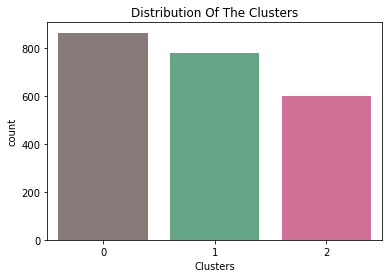

In [45]:
#Plotting countplot of clusters
pal = ["#887A77","#5AB085", "#DF6193"]
pl = sns.countplot(x=data["Clusters"], palette=pal)
pl.set_title("Distribution Of The Clusters")
plt.show()